<a href="https://colab.research.google.com/github/ayushtyagi04/data-analytics-projects/blob/main/AyushTyagi_Manufacturing_Quality_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Simulate 120 days of defect data
np.random.seed(42)
days= pd.date_range(start='2024-01-01', periods=120)
sample_size = np.random.randint(80, 120, size=120) # daily sample sizes
true_defect_rate = np.linspace(0.05, 0.12,num=120)

In [ ]:
# Simulate daily defect counts
defect_count = np.random.binomial (sample_size, true_defect_rate)
df = pd.DataFrame({
    'Date': days,
    'Sample_Size': sample_size,
    'Defects': defect_count
})

In [ ]:
df['Defect_Rate'] = df['Defects'] / df['Sample_Size']
print(df.head(),end="\n\n")
print(df.tail())

        Date  Sample_Size  Defects  Defect_Rate
0 2024-01-01          118        7     0.059322
1 2024-01-02          108        3     0.027778
2 2024-01-03           94        4     0.042553
3 2024-01-04           87        3     0.034483
4 2024-01-05          100        8     0.080000

          Date  Sample_Size  Defects  Defect_Rate
115 2024-04-25          105       12     0.114286
116 2024-04-26           93       20     0.215054
117 2024-04-27          118       11     0.093220
118 2024-04-28          106        6     0.056604
119 2024-04-29           88       10     0.113636


In [ ]:
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()

df['p_bar']=p_bar
df['UCL'] = p_bar + 3*np.sqrt((p_bar*(1-p_bar))/df['Sample_Size'])
df['LCL'] = p_bar - 3*np.sqrt((p_bar*(1-p_bar))/df['Sample_Size'])
df['LCL'] = df['LCL'].clip(lower=0)

In [ ]:
df.head()

,Date,Sample_Size,Defects,Defect_Rate,p_bar,UCL,LCL
0,2024-01-01,118,7,0.059322,0.088307,0.166668,0.009946
1,2024-01-02,108,3,0.027778,0.088307,0.170216,0.006398
2,2024-01-03,94,4,0.042553,0.088307,0.176104,0.000510
3,2024-01-04,87,3,0.034483,0.088307,0.179567,0.000000
4,2024-01-05,100,8,0.080000,0.088307,0.173429,0.003185


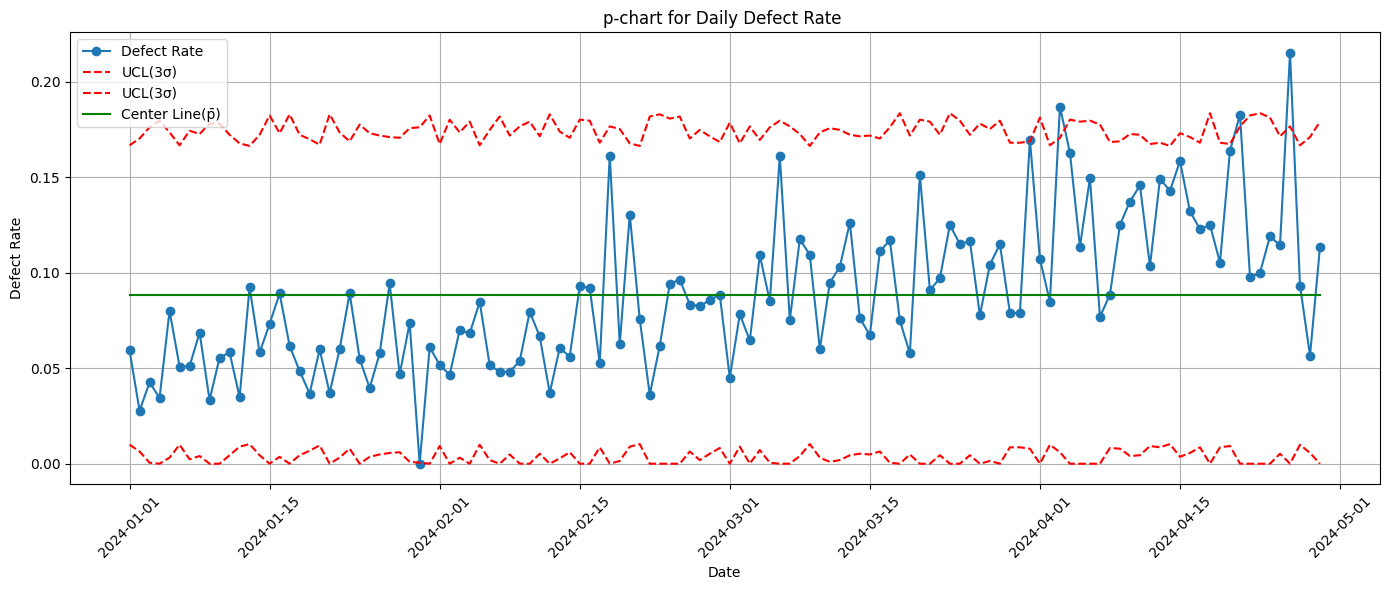

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o' , label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--',color='red', label='UCL(3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--',color='red', label='UCL(3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='-',color='green', label='Center Line(p̄)')
plt.title('p-chart for Daily Defect Rate ')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['Out_of_Control'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])
print(df[df['Out_of_Control']][['Date', 'Defect_Rate', 'UCL', 'LCL']])

          Date  Defect_Rate       UCL       LCL
29  2024-01-30     0.000000  0.176104  0.000510
90  2024-03-31     0.169643  0.168740  0.007874
93  2024-04-03     0.186916  0.170598  0.006016
111 2024-04-21     0.182796  0.176575  0.000039
116 2024-04-26     0.215054  0.176575  0.000039


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Get the last day's data
last = df.iloc[-1]
count = last['Defects']
nobs = last['Sample_Size']

# Perform one-sided z-test (alternative = 'larger')
stat, pval = proportions_ztest(count, nobs, value=p_bar, alternative='larger')

# Display the result
print(f"Z-statistic: {stat:.2f}, p-value: {pval:.4f}")

if pval < 0.05:
    print(" Statistically significant increase in defects!")
else:
    print("ℹ No significant shift detected.")

Z-statistic: 0.75, p-value: 0.2270
ℹ No significant shift detected.


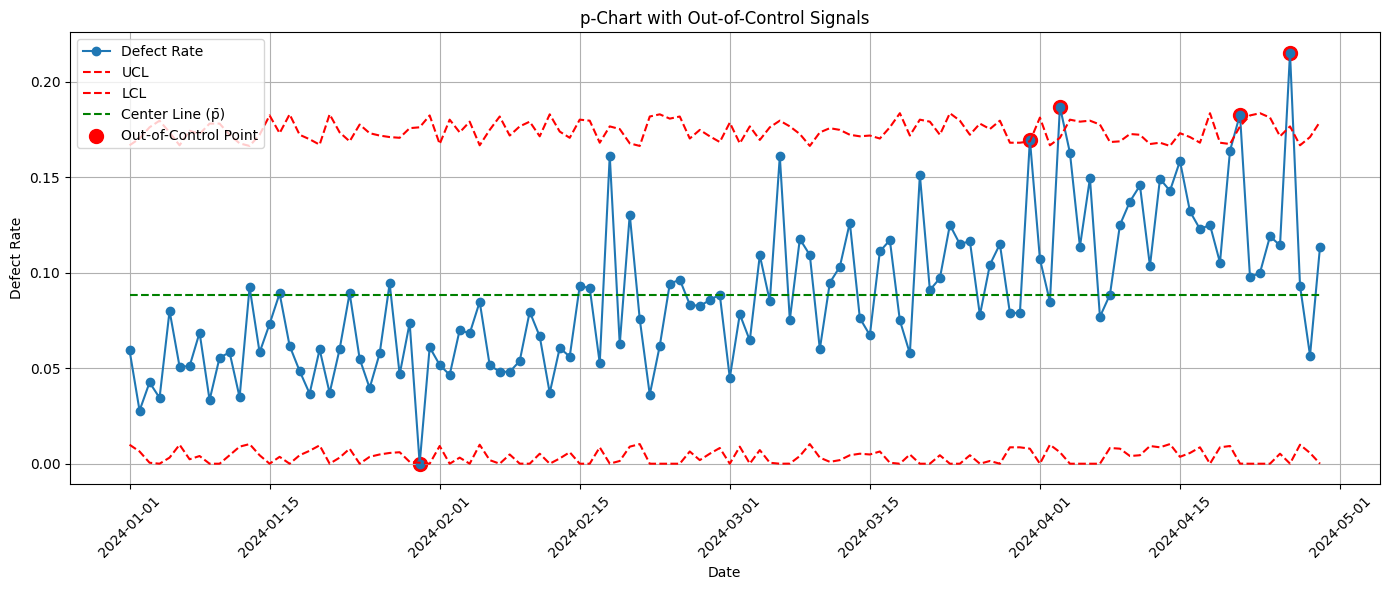

In [ ]:
plt.figure(figsize=(14, 6))

# Main defect rate line
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')

# Control limits and center line
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL')
plt.plot(df['Date'], df['p_bar'], linestyle='--', color='green', label='Center Line (p̄)')

# Highlight out-of-control points
out = df[df['Out_of_Control']]
plt.scatter(out['Date'], out['Defect_Rate'], color='red', s=100, label='Out-of-Control Point')

# Plot settings
plt.title('p-Chart with Out-of-Control Signals')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.loc[75:, 'Defects'] = np.random.binomial(df.loc[75:, 'Sample_Size'], 0.10)  # doubled defect rate
df['Defect_Rate'] = df['Defects'] / df['Sample_Size']

In [ ]:
# Recalculate p̄ and control limits
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()
df['p_bar'] = p_bar
df['UCL'] = p_bar + 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = p_bar - 3 * np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])
df['LCL'] = df['LCL'].clip(lower=0)


In [ ]:
# Flag out-of-control points
df['Out_of_Control'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])
out_points = df[df['Out_of_Control']]

In [ ]:
# Identify first out-of-control point AFTER the shift
first_shift_index = 75
first_out_after_shift = df.loc[first_shift_index:].query("Out_of_Control").head(1)

/tmp/ipython-input-16-3440187552.py:32: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


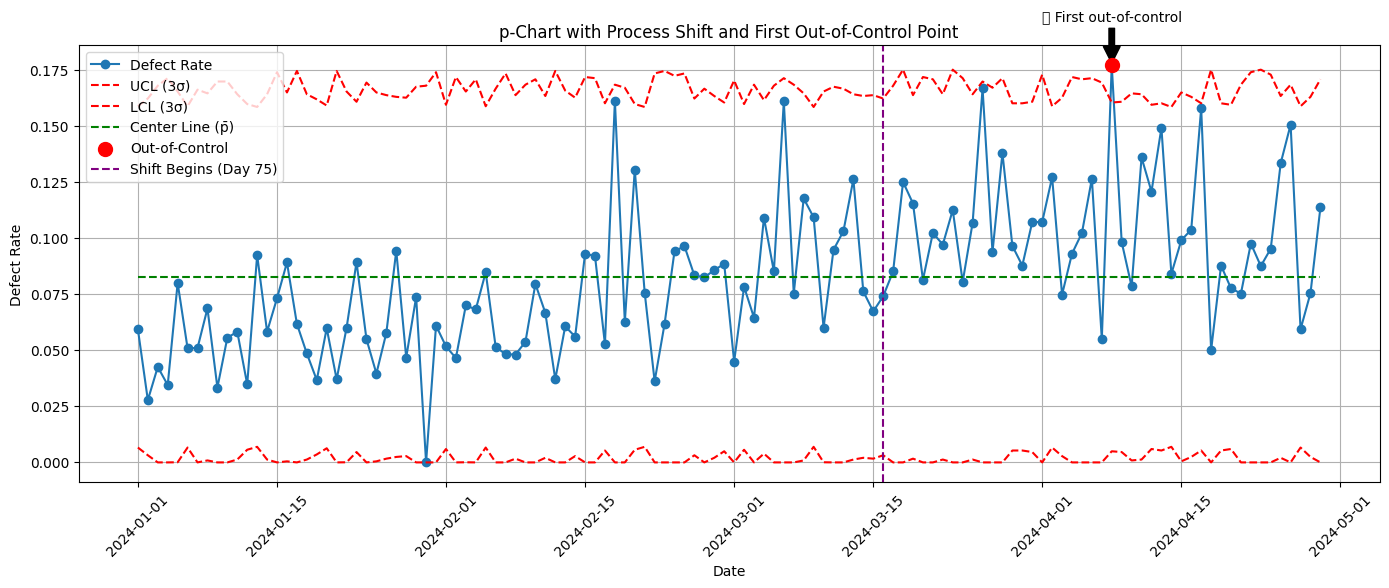

In [ ]:
# Plot setup
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='--', color='green', label='Center Line (p̄)')
plt.scatter(out_points['Date'], out_points['Defect_Rate'], color='red', s=100, zorder=5, label='Out-of-Control')

# FIXED: Use axvline for vertical line
plt.axvline(x=df['Date'].iloc[first_shift_index], color='purple', linestyle='--', label='Shift Begins (Day 75)')

# Add annotation to first out-of-control point after shift
if not first_out_after_shift.empty:
    x = first_out_after_shift['Date'].values[0]
    y = first_out_after_shift['Defect_Rate'].values[0]
    plt.annotate(
        '🔺 First out-of-control',
        xy=(x, y),
        xytext=(x, y + 0.02),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=10,
        ha='center'
    )

# Labels and Layout
plt.title('p-Chart with Process Shift and First Out-of-Control Point')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Estimate standard deviation (σ) for each row
df['sigma'] = np.sqrt((df['p_bar'] * (1 - df['p_bar'])) / df['Sample_Size'])

In [ ]:
# Step 2: Compute 1σ and 2σ control limits
df['Upper_1sigma'] = df['p_bar'] + df['sigma']
df['Lower_1sigma'] = df['p_bar'] - df['sigma']
df['Upper_2sigma'] = df['p_bar'] + 2 * df['sigma']
df['Lower_2sigma'] = df['p_bar'] - 2 * df['sigma']

In [ ]:
# Rule 1: One point beyond UCL or LCL
df['Rule1'] = (df['Defect_Rate'] > df['UCL']) | (df['Defect_Rate'] < df['LCL'])

In [ ]:
# Rule 2: 2 of 3 consecutive points beyond 2σ on the same side
rule2_flags = [False] * len(df)

for i in range(2, len(df)):
    window = df.iloc[i-2:i+1]

    upper = (window['Defect_Rate'] > window['Upper_2sigma']).sum()
    lower = (window['Defect_Rate'] < window['Lower_2sigma']).sum()

    if upper >= 2 or lower >= 2:
        rule2_flags[i] = True

df['Rule2'] = rule2_flags

In [ ]:
# Rule 4: 8 points in a row on same side of center line (p̄)
df['Above_Center'] = df['Defect_Rate'] > df['p_bar']

run_lengths = [1]
for i in range(1, len(df)):
    if df.loc[i, 'Above_Center'] == df.loc[i - 1, 'Above_Center']:
        run_lengths.append(run_lengths[-1] + 1)
    else:
        run_lengths.append(1)

df['Run_Length'] = run_lengths
df['Rule4'] = df['Run_Length'] >= 8

In [ ]:
# Combine all rules
df['Any_Rule_Violation'] = df[['Rule1', 'Rule2', 'Rule4']].any(axis=1)

In [ ]:
# View all rule violations
violations = df[df['Any_Rule_Violation']]
print(violations[['Date', 'Defect_Rate', 'Rule1', 'Rule2', 'Rule4']])

         Date  Defect_Rate  Rule1  Rule2  Rule4
7  2024-01-08     0.068627  False  False   True
8  2024-01-09     0.033333  False  False   True
9  2024-01-10     0.055556  False  False   True
10 2024-01-11     0.058252  False  False   True
11 2024-01-12     0.034783  False  False   True
34 2024-02-04     0.068182  False  False   True
43 2024-02-13     0.060606  False  False   True
44 2024-02-14     0.056075  False  False   True
91 2024-04-01     0.107143  False  False   True
92 2024-04-02     0.127119  False  False   True
98 2024-04-08     0.176991   True  False  False


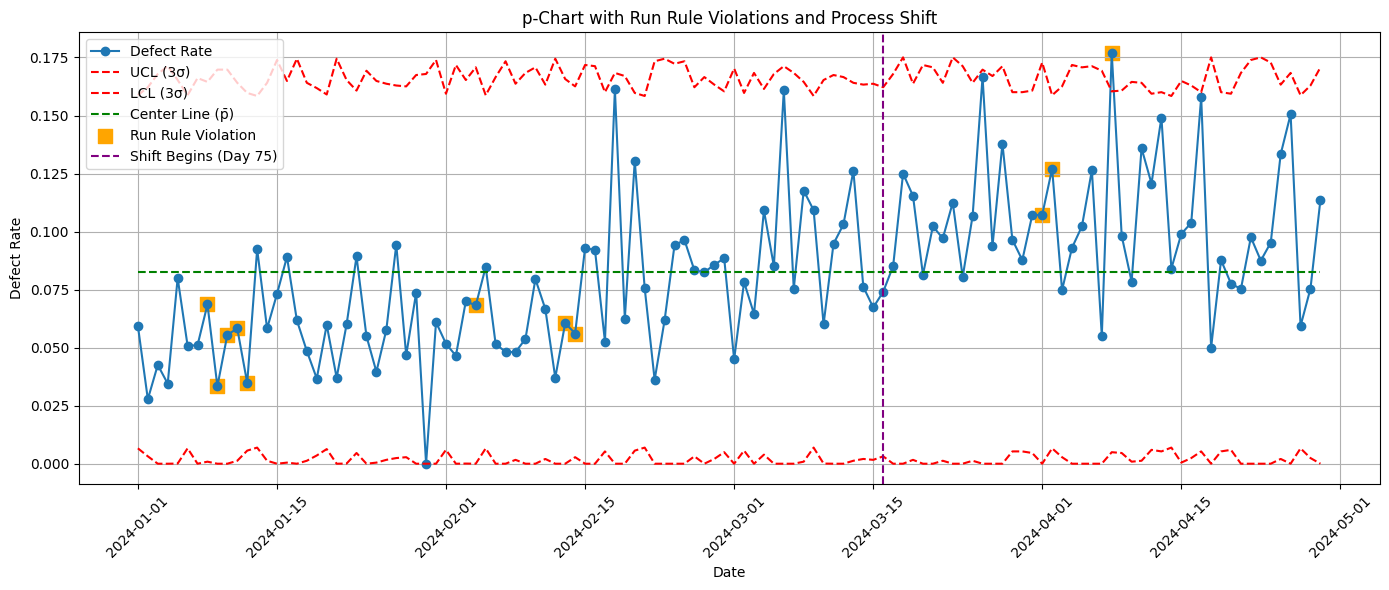

In [ ]:
plt.figure(figsize=(14, 6))

# Main defect rate line
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')

# Control limits and center line
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['Date'], df['p_bar'], linestyle='--', color='green', label='Center Line (p̄)')

# Highlight rule violations
plt.scatter(violations['Date'], violations['Defect_Rate'], color='orange', s=100, marker='s', label='Run Rule Violation')

# Add vertical line to indicate process shift (e.g., Day 35)
plt.axvline(df['Date'].iloc[75], color='purple', linestyle='--', label='Shift Begins (Day 75)')

# Final touches
plt.title('p-Chart with Run Rule Violations and Process Shift')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assume specifications: acceptable defect rate between 2% and 8%
USL = 0.08  # Upper Spec Limit
LSL = 0.02  # Lower Spec Limit

# Estimate process standard deviation from observed data
process_sigma = df['Defect_Rate'].std()

# Compute Cp and Cpk
Cp = (USL - LSL) / (6 * process_sigma)
Cpk = min((USL - p_bar), (p_bar - LSL)) / (3 * process_sigma)

# Print results
print(f"Cp: {Cp:.2f}, Cpk: {Cpk:.2f}")

Cp: 0.30, Cpk: -0.03


In [ ]:
# Bootstrap resampling to estimate 95% CI of the mean defect rate
boot_means = [np.mean(np.random.choice(df['Defect_Rate'], size=len(df), replace=True)) for _ in range(1000)]

ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"95% CI for average defect rate: ({ci_lower:.4f}, {ci_upper:.4f})")

95% CI for average defect rate: (0.0766, 0.0881)


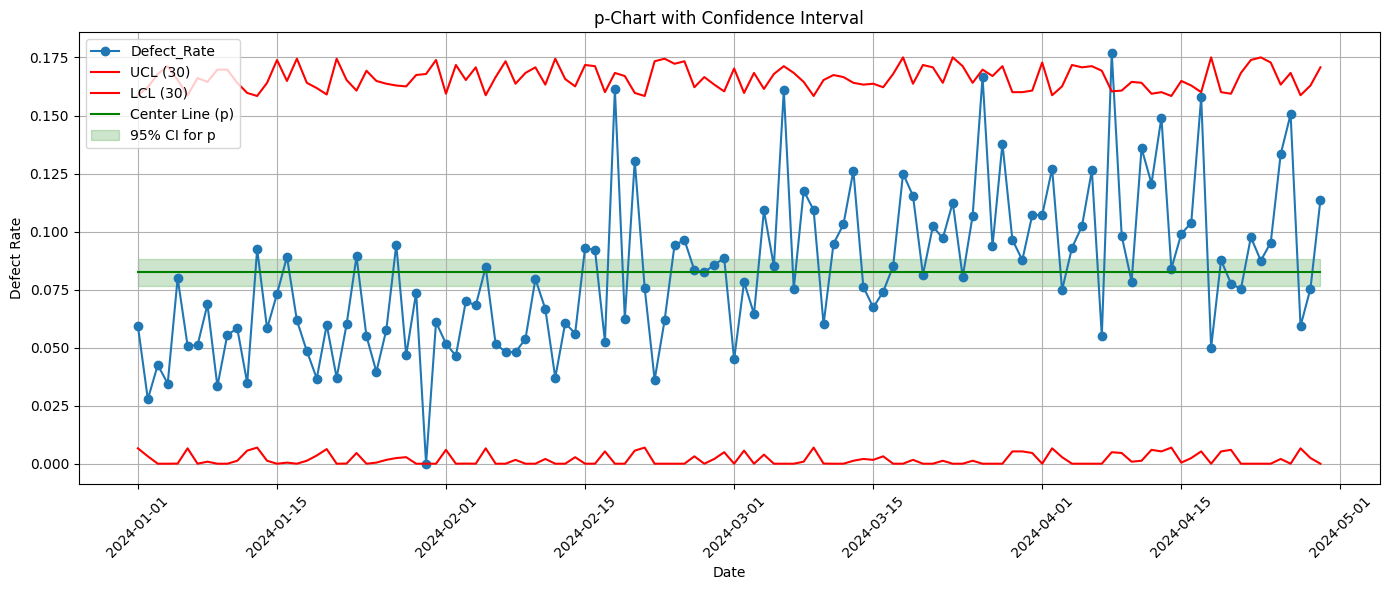

In [ ]:
# Sample column names used:
# df['Date'], df['Defect Rate'], df['UCL'], df['LCL'], df['p_bar'], df['ci_lower'], df['ci_upper']

plt.figure(figsize=(14, 6))

# Line plots
plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect_Rate')
plt.plot(df['Date'], df['UCL'], linestyle='-', color='red', label='UCL (30)')
plt.plot(df['Date'], df['LCL'], linestyle='-', color='red', label='LCL (30)')
plt.plot(df['Date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p)')

# Confidence interval shading
plt.fill_between(
    df['Date'],ci_lower,ci_upper,
    color='green',
    alpha=0.2,
    label='95% CI for p'
)

# Finalizing chart
plt.title("p-Chart with Confidence Interval")
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


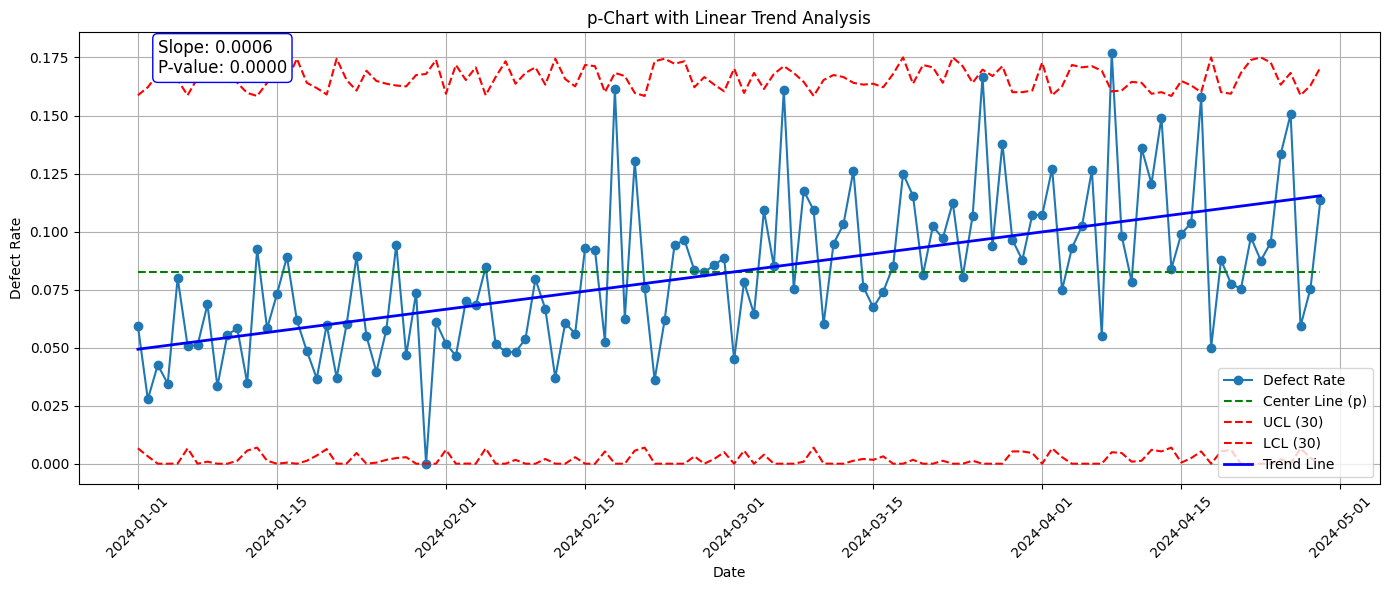

In [ ]:
from scipy.stats import linregress
# Step 1: Create a numeric "Day" column
df['Day'] = range(1, len(df) + 1)

# Step 2: Run Linear regression on defect rate over time
trend_result = linregress(df['Day'], df['Defect_Rate'])
slope = trend_result.slope
p_value = trend_result.pvalue
intercept = trend_result.intercept

# Step 3: Create trend line values
df['Trend_Line'] = intercept + slope * df['Day']

# Step 4: Plot p-chart with trend line
plt.figure(figsize=(14, 6))

plt.plot(df['Date'], df['Defect_Rate'], marker='o', label='Defect Rate')
plt.plot(df['Date'], df['p_bar'], linestyle='--', color='green', label='Center Line (p)')
plt.plot(df['Date'], df['UCL'], linestyle='--', color='red', label='UCL (30)')
plt.plot(df['Date'], df['LCL'], linestyle='--', color='red', label='LCL (30)')

# Add trend line
plt.plot(df['Date'], df['Trend_Line'], linestyle='-', color='blue', linewidth=2, label='Trend Line')

# Step 5: Annotate with slope and p-value
plt.text(
    df['Date'].iloc[2],
    max(df['Defect_Rate']) * 0.95,
    f"Slope: {slope:.4f}\nP-value: {p_value:.4f}",
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round')
)

# Final touches
plt.title('p-Chart with Linear Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


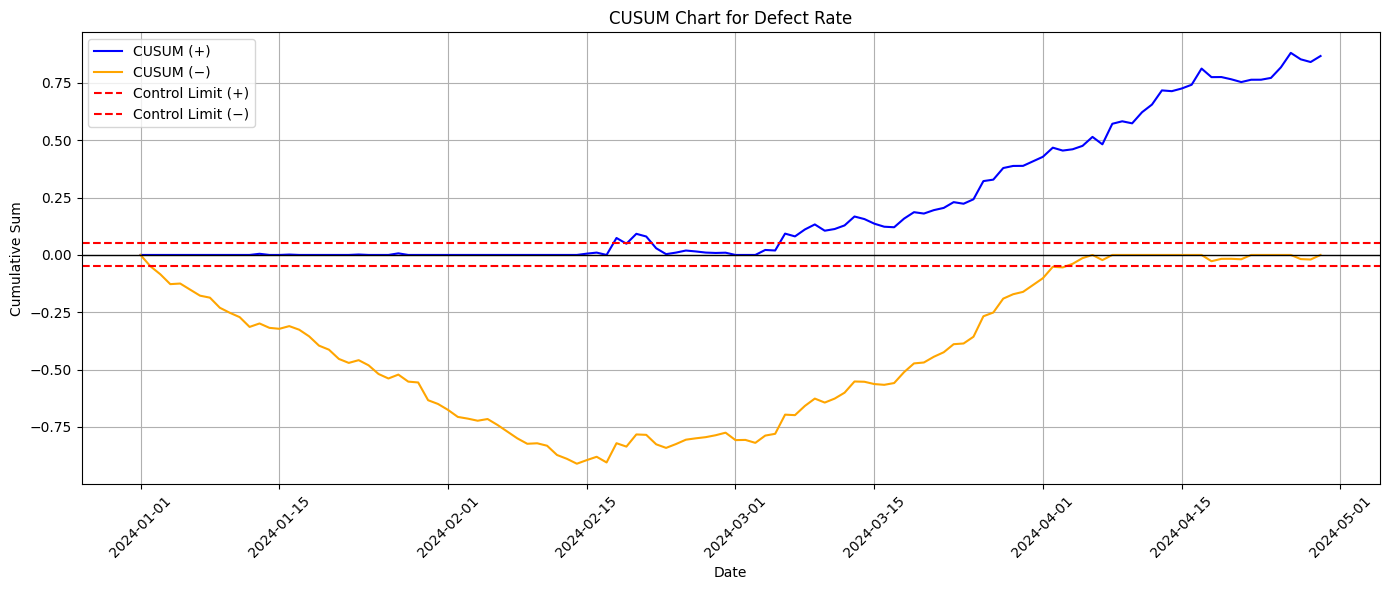

In [ ]:
# CUSUM parameters
target = df['Defect_Rate'].mean()  # Center line (p-bar)
k = 0.005                          # Reference value (tuning sensitivity)
h = 0.05                           # Decision threshold (control limit)

# Initialize CUSUM lists
cusum_pos = [0]
cusum_neg = [0]

# Calculate CUSUM values
for i in range(1, len(df)):
    p_i = df.loc[i, 'Defect_Rate']
    s_pos = max(0, cusum_pos[-1] + (p_i - target - k))
    s_neg = min(0, cusum_neg[-1] + (p_i - target + k))
    cusum_pos.append(s_pos)
    cusum_neg.append(s_neg)

# Add to DataFrame
df['CUSUM_Pos'] = cusum_pos
df['CUSUM_Neg'] = cusum_neg

# Plot CUSUM
plt.figure(figsize=(14, 6))

plt.plot(df['Date'], df['CUSUM_Pos'], color='blue', label='CUSUM (+)')
plt.plot(df['Date'], df['CUSUM_Neg'], color='orange', label='CUSUM (−)')

plt.axhline(h, color='red', linestyle='--', label='Control Limit (+)')
plt.axhline(-h, color='red', linestyle='--', label='Control Limit (−)')
plt.axhline(0, color='black', linestyle='-', linewidth=1)

plt.title('CUSUM Chart for Defect Rate')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-765115326.py:82: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipython-input-31-765115326.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


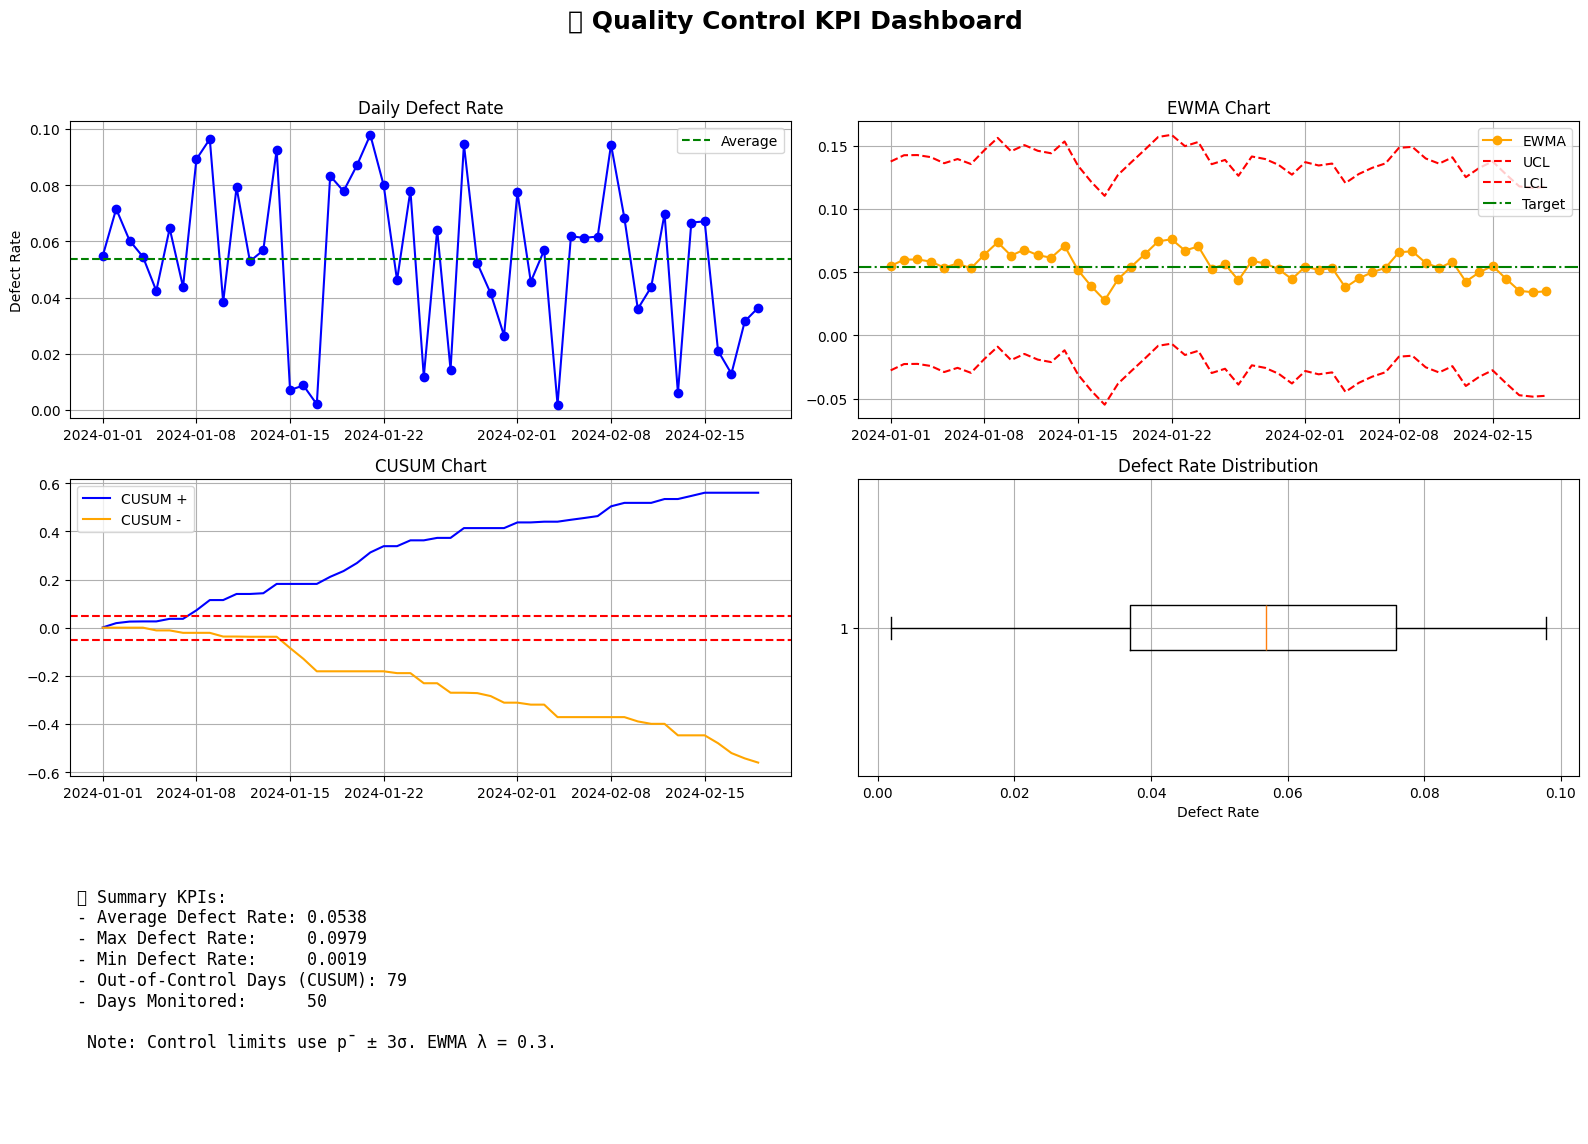

In [ ]:
# --- Simulated Sample Data ---
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=50)
defect_rate = np.random.rand(50) * 0.1

df = pd.DataFrame({
    'Date': dates,
    'Defect_Rate': defect_rate
})

# --- EWMA Calculation ---
lambda_ = 0.3
df['EWMA'] = df['Defect_Rate'].ewm(alpha=lambda_, adjust=False).mean()
std_dev = df['Defect_Rate'].std()
df['UCL_EWMA'] = df['EWMA'] + 3 * std_dev
df['LCL_EWMA'] = df['EWMA'] - 3 * std_dev

# --- CUSUM Calculation ---
target = df['Defect_Rate'].mean()
df['CUSUM_Pos'] = (df['Defect_Rate'] - target).clip(lower=0).cumsum()
df['CUSUM_Neg'] = (df['Defect_Rate'] - target).clip(upper=0).cumsum()

# --- Recalculate KPIs ---
avg_defect_rate = df['Defect_Rate'].mean()
max_defect_rate = df['Defect_Rate'].max()
min_defect_rate = df['Defect_Rate'].min()
out_of_control_days = (df['CUSUM_Pos'] > 0.05).sum() + (df['CUSUM_Neg'] < -0.05).sum()

# --- Dashboard Plotting ---
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('📊 Quality Control KPI Dashboard', fontsize=18, fontweight='bold')

# 1. Daily Defect Rate
axs[0, 0].plot(df['Date'], df['Defect_Rate'], marker='o', color='blue')
axs[0, 0].axhline(avg_defect_rate, color='green', linestyle='--', label='Average')
axs[0, 0].set_title('Daily Defect Rate')
axs[0, 0].set_ylabel('Defect Rate')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. EWMA Chart
axs[0, 1].plot(df['Date'], df['EWMA'], marker='o', label='EWMA', color='orange')
axs[0, 1].plot(df['Date'], df['UCL_EWMA'], linestyle='--', color='red', label='UCL')
axs[0, 1].plot(df['Date'], df['LCL_EWMA'], linestyle='--', color='red', label='LCL')
axs[0, 1].axhline(avg_defect_rate, color='green', linestyle='-.', label='Target')
axs[0, 1].set_title('EWMA Chart')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. CUSUM Chart
axs[1, 0].plot(df['Date'], df['CUSUM_Pos'], label='CUSUM +', color='blue')
axs[1, 0].plot(df['Date'], df['CUSUM_Neg'], label='CUSUM -', color='orange')
axs[1, 0].axhline(0.05, color='red', linestyle='--')
axs[1, 0].axhline(-0.05, color='red', linestyle='--')
axs[1, 0].set_title('CUSUM Chart')
axs[1, 0].grid(True)
axs[1, 0].legend()

# 4. Boxplot
axs[1, 1].boxplot(df['Defect_Rate'], vert=False)
axs[1, 1].set_title('Defect Rate Distribution')
axs[1, 1].set_xlabel('Defect Rate')
axs[1, 1].grid(True)

# 5. KPI Summary
axs[2, 0].axis('off')
kpi_text = f"""
🔧 Summary KPIs:
- Average Defect Rate: {avg_defect_rate:.4f}
- Max Defect Rate:     {max_defect_rate:.4f}
- Min Defect Rate:     {min_defect_rate:.4f}
- Out-of-Control Days (CUSUM): {out_of_control_days}
- Days Monitored:      {len(df)}

 Note: Control limits use p̄ ± 3σ. EWMA λ = 0.3.
"""
axs[2, 0].text(0.01, 0.9, kpi_text, fontsize=12, verticalalignment='top', family='monospace')

# 6. Placeholder
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()